In [311]:
import pathlib
import pandas as pd
import seaborn as sns
import timeit

In [350]:
from implementations import BSoup, Lxml

In [345]:
def run_all_benchmarks():
    methods = [
        #("load_dom", 5),
        #("links_natural", 100),
        #("links_css", 100),
        ("count_elements", 100),
        ("extract_text", 100),
    ]
    implementations = [
        Lxml(), BSoup("html.parser"), BSoup("html5lib"), BSoup("lxml")
    ]
    runs = []
    for impl in implementations:
        impl.pre_parse()
        for example in impl.examples:
            for method, count in methods:
                time = timeit.timeit("method(example)",
                    globals={"method": getattr(impl, method), "example": example},
                    number=count)
                results = len(getattr(impl, method)(example))
                runs.append({"implementation": str(impl),
                             "example": example,
                             "method": method,
                             "average_time": time / count,
                             "count": count,
                             "results": results})
    return pd.DataFrame(runs)


In [346]:
df = run_all_benchmarks()

In [347]:
def show_results(df, method, examples=None):
    """
    Show relative times and overall graph for benchmark.
    """
    sns.set_theme(style="white")
    filtered = df[df.method == method]
    if examples:
        filtered = filtered[(df.example.isin(examples))]
    ax = sns.barplot(filtered, x="example", y="average_time", hue="implementation")
    ax.set_ylabel("Avg. Time (s)")
    ax.set_xlabel("Example HTML")
    ax.set_title(f"{method} (N={filtered['count'].iloc[0]})")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    means = filtered.groupby("implementation").mean("average_time")
    means /= means.loc["lxml.html"]
    print(means)

    comparison = filtered[["implementation", "example", "results"]]
    comparison = comparison.pivot(index="example", columns="implementation", values="results")
    print(comparison.to_markdown(index=True))

In [348]:
# show_results(df, "links_natural", ["asha_bhosle", "python"])

                            average_time  count   results
implementation                                           
BeautifulSoup[html.parser]      0.717093    1.0  1.000027
BeautifulSoup[html5lib]         0.755461    1.0  1.000409
BeautifulSoup[lxml]             0.706535    1.0  1.000027
lxml.html                       1.000000    1.0  1.000000
| example     |   BeautifulSoup[html.parser] |   BeautifulSoup[html5lib] |   BeautifulSoup[lxml] |   lxml.html |
|:------------|-----------------------------:|--------------------------:|----------------------:|------------:|
| asha_bhosle |                        38454 |                     38454 |                 38454 |       38453 |
| python      |                        34945 |                     34973 |                 34945 |       34944 |


/var/folders/5g/gtr086hd3q5gx90mgfzhrlhr0000gp/T/ipykernel_77911/2822006874.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = filtered[(df.example.isin(examples))]


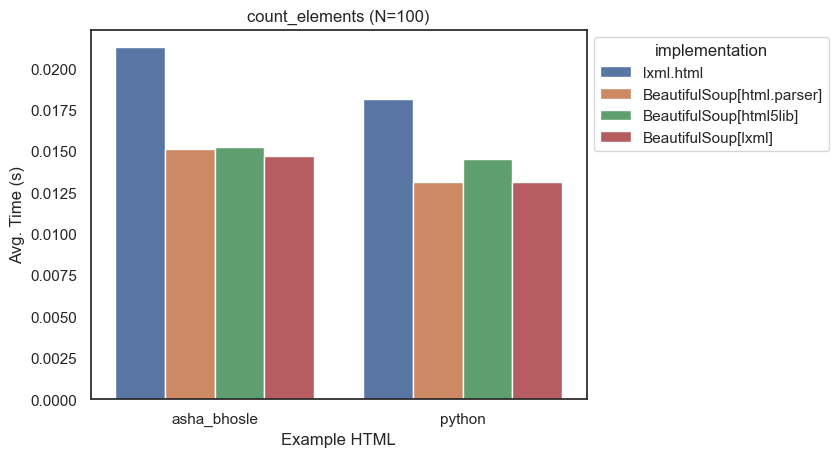

In [349]:
show_results(df, "count_elements", ["asha_bhosle", "python"])

                            average_time  count   results
implementation                                           
BeautifulSoup[html.parser]      6.661089    1.0  0.872349
BeautifulSoup[html5lib]         7.029440    1.0  0.999996
BeautifulSoup[lxml]             7.015977    1.0  0.872346
lxml.html                       1.000000    1.0  1.000000
| example     |   BeautifulSoup[html.parser] |   BeautifulSoup[html5lib] |   BeautifulSoup[lxml] |   lxml.html |
|:------------|-----------------------------:|--------------------------:|----------------------:|------------:|
| asha_bhosle |                       453835 |                    464164 |                453834 |      464165 |
| python      |                       453848 |                    576337 |                453846 |      576340 |


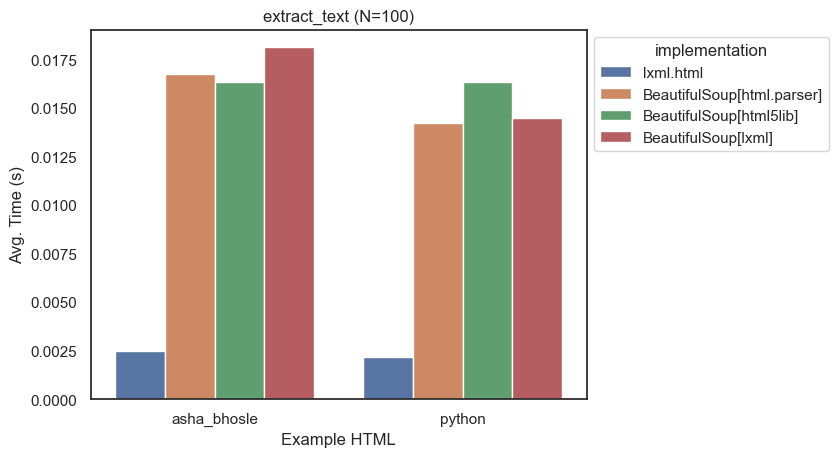

In [343]:
show_results(df, "extract_text", ["asha_bhosle", "python"])